In [205]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [234]:
#Read dataset
zhvi_dataset = pd.read_csv("../Zip(zhvf_and_zhvi)_combined/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zhvi_dataset.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,210115.649133,...,487417.408782,488792.727435,490953.961843,493764.629294,496284.689998,497597.965629,497904.508357,497525.166064,497932.811213,498624.058988
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,138190.224310,...,587035.721219,588629.641020,591203.603657,596333.583567,604688.550311,612076.603761,617531.871790,622433.089855,627699.846638,633902.162029
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103030.935699,...,276821.427264,277174.536177,277871.353968,278961.940193,279916.177474,280446.900967,280407.399117,280174.421115,279993.811959,279806.751424
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,149541.567251,...,454925.742157,452068.717877,450448.651203,453539.551510,458095.452458,462764.716450,463474.489325,462960.352042,462321.216661,463290.574508
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,102153.208791,...,271678.791950,271724.750316,272249.216554,273247.830993,274236.938985,274737.845371,274571.491387,274279.811068,274007.776630,273755.457541


In [235]:
zhvi_dataset["RegionType"].unique()

array(['zip'], dtype=object)

In [ ]:
#seasonal trend analysis graph for how seasons effect areas

[394692]


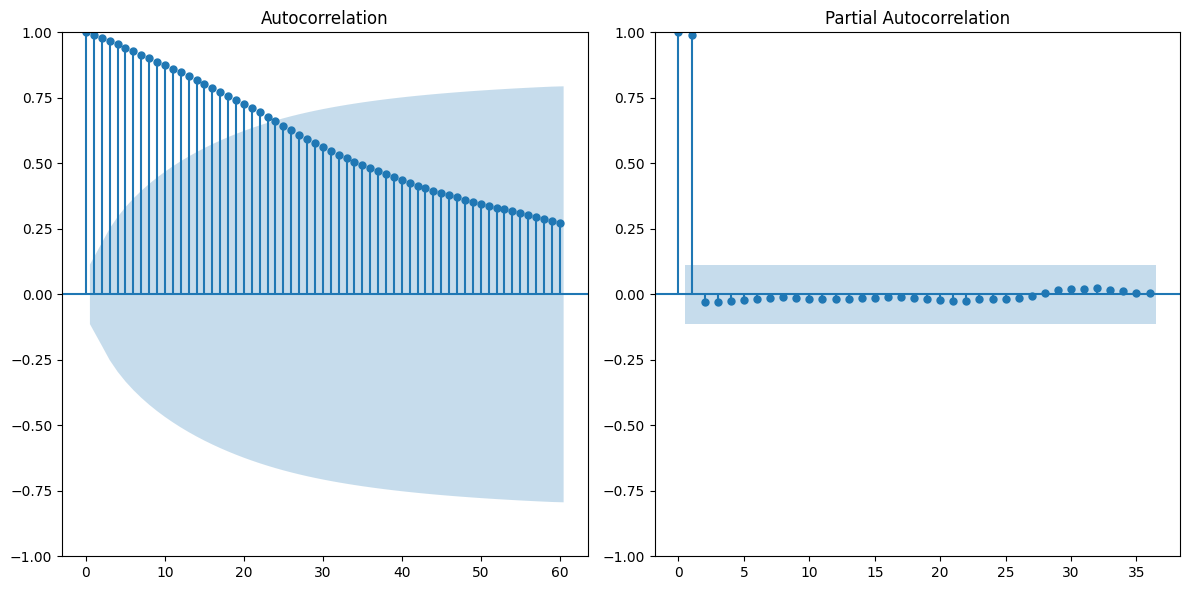

In [170]:
test_sample = zhvi_dataset.iloc[:, [0]+list(range(5, zhvi_dataset.shape[1]))]
test_sample = test_sample[test_sample["RegionID"]==394692]
test_long = pd.melt(test_sample, id_vars=["RegionID"], var_name="Month", value_name="Price")
print(test_long["RegionID"].unique())
plt.figure(figsize=(12, 6))

# ACF plot (AutoCorrelation Function)
plt.subplot(121)  # 1 row, 2 columns, from statsmodels.tsa.stattools import adfuller
plot_acf(test_long['Price'], lags=60, ax=plt.gca())  # Plot ACF for 30 lags

# PACF plot (Partial AutoCorrelation Function)
plt.subplot(122)  # 1 row, 2 columns, second plot
plot_pacf(test_long['Price'], lags=36, ax=plt.gca())  # Plot PACF for 30 lags

# Show the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [149]:
test_long = zhvi_dataset.head().head()long.sort_values(by="Month")
model = ARIMA(test_long["Price"],order=(2,1,1))
model_trained = model.fit()
forecast = model_trained.forecast(steps=12)
print(forecast)
#950360

297    951778.166552
298    952207.123129
299    952441.848761
300    952638.425146
301    952827.506416
302    953015.112979
303    953202.427233
304    953389.681397
305    953576.921079
306    953764.155236
307    953951.385629
308    954138.612601
Name: predicted_mean, dtype: float64


In [181]:
print((307142-307166)*100/307166)

-0.007813364760422704


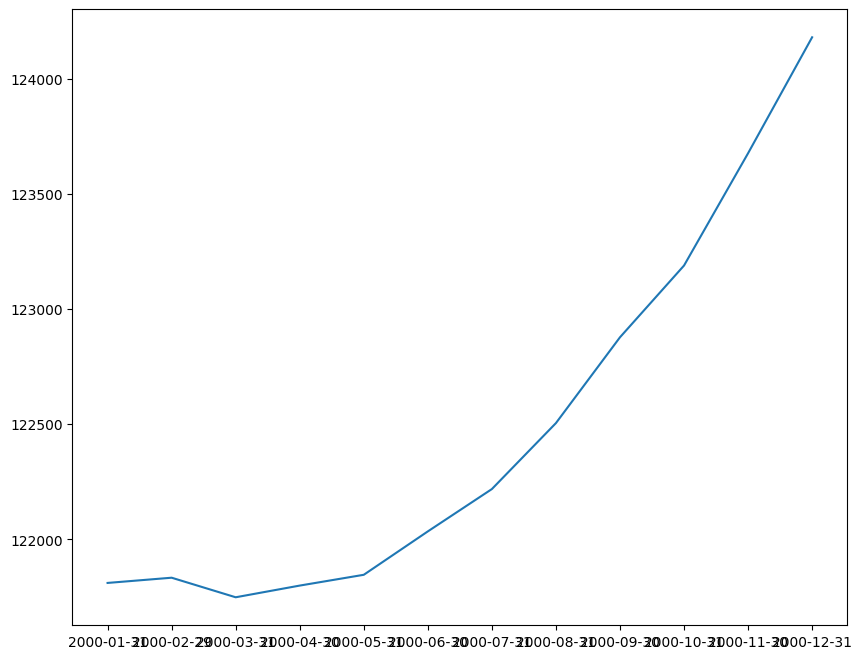

In [184]:
plt.figure(figsize=(10, 8))
plt.plot(test_long.iloc[:12,1],test_long.iloc[:12,2])
#plt.xticks(test_long['Month'][::12], rotation=45) 

In [120]:
p_values = range(48,61)
q_values = range(0,3)
d_values = range(0,2)

In [ ]:
#1 year
#5 years
#10 years
#All time

In [240]:
#zvhf dataset
zhvf_dataset = pd.read_csv("../Zip(zhvf_and_zhvi)_combined/Zip_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zhvf_dataset = zhvf_dataset.iloc[:,[2,10,11,12]]
zhvf_dataset

,RegionName,2024-10-31,2024-12-31,2025-09-30
0,77494,0.1,-0.5,-1.1
1,8701,0.5,0.1,-0.4
2,77449,-0.2,-1.1,-1.2
3,11368,-0.2,-0.9,-0.5
4,77084,-0.2,-0.9,-1.2
...,...,...,...,...
20157,31648,-1.2,-1.1,-0.1
20158,33855,-0.1,-0.7,0.5
20159,34138,-0.9,-2.3,0.2
20160,48853,0.3,0.5,0.2


In [325]:
columns = ["RegionName", "one_month_sign_acc", "quarter_sign_acc","year_sign_acc","one_month_rms","quarter_rms","year_rms","time_used"]
predicted_df = pd.DataFrame(columns=columns)
#predicted_df


(26337, 306)

In [330]:
#ignore first row 
zhvi_dataset_clean = zhvi_dataset.iloc[1:,[2]+list(range(9, zhvi_dataset.shape[1]))]
count=0

for region in zhvi_dataset_clean["RegionName"].unique():
    region_data =  zhvi_dataset_clean[zhvi_dataset["RegionName"]==region]#[[0]+list(range(5, zhvi_dataset.shape[1]))]
    region_data = pd.melt(region_data, id_vars=["RegionName"], var_name="Month", value_name="Price")
    region_data = region_data.sort_values(by = "Month")
    #region_data = region_data.iloc[-13:,:] 
    #print(region_data)
    model = ARIMA(region_data["Price"],order=(1,1,1))
    model_trained = model.fit()
    forecast = model_trained.forecast(steps=12)
    future_prices = [forecast.iloc[0],forecast.iloc[2],forecast.iloc[11]]
    zillow_region_preds = zhvf_dataset[zhvf_dataset["RegionName"]==region]
    last_known_price = int(region_data["Price"].tail(1))
    #calculate change
    future_change_rates = [(i-last_known_price)*100/last_known_price for i in future_prices]   
    #print(future_change_rates) 
    #print(zillow_region_preds)
    predicted_df.loc[count,"RegionName"] = region
    predicted_df.loc[count,"time_used"] = "all"
    #print(predicted_df)
    
    for i in range(len(future_change_rates)):
        if zillow_region_preds.empty:
            continue
        diff = abs(float(zillow_region_preds.iloc[0,1+i] - future_change_rates[i]))

        sign_acc = (1 if float(zillow_region_preds.iloc[0,1+i]) * future_change_rates[i] > 0 else 0 )
        predicted_df.iloc[count,1+i] = sign_acc
        predicted_df.iloc[count,4+i] = diff
        
    count+=1
    #print(sign_acc)predicted_df
    #print(sign_acc)
    #plt.figure(figsize=(10, 8))regionregion
    #plt.plot([i for ipass in range(12)],forecast)
    #plt.xticks(test_long['Montsign_accsign_acch'][::12], rotation=45) 
    #print(region_data["RegionID"])
    #print(last_known_price)

print(predicted_df.shape)

/tmp/ipykernel_207134/433450913.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_data =  zhvi_dataset_clean[zhvi_dataset["RegionName"]==region]#[[0]+list(range(5, zhvi_dataset.shape[1]))]
/tmp/ipykernel_207134/433450913.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  last_known_price = int(region_data["Price"].tail(1))
/tmp/ipykernel_207134/433450913.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_data =  zhvi_dataset_clean[zhvi_dataset["RegionName"]==region]#[[0]+list(range(5, zhvi_dataset.shape[1]))]
/tmp/ipykernel_207134/433450913.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  last_known_price = int(region_data["Price"].tail(1))
/tmp/ipykernel_207134/433450913.py:6: UserWarning: Boolean Series key will

KeyboardInterrupt: 

In [319]:
print(predicted_df.shape)

(500, 8)


In [328]:
print(predicted_df.iloc[:,1:-1].mean())

one_month_sign_acc    0.653846
quarter_sign_acc      0.485904
year_sign_acc         0.539267
one_month_rms         0.182592
quarter_rms           0.846986
year_rms              1.767899
dtype: object


In [329]:
predicted_df.to_csv("./predicted_values.csv")